In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from rdkit import Chem
from rdkit.Chem import Descriptors

In [2]:
frag_enum_data=pd.read_pickle("ProcessedData/frag_enum_data.pkl")

iupac_name: 1,1,1-trifluoroethane
molecular_formula: C2H3F3
weight: 84.03999999999999
SMILES: [H]C([H])([H])C(F)(F)F


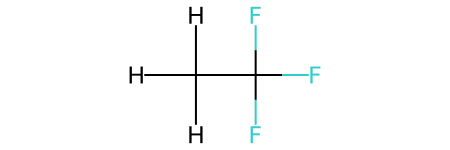

[ 2. 12. 13. 14. 15. 16. 19. 20. 24. 25. 26. 27. 31. 32. 33. 34. 43. 44.
 45. 46. 50. 51. 52. 62. 63. 64. 65. 66. 69. 70. 81. 82. 83. 84. 85.]


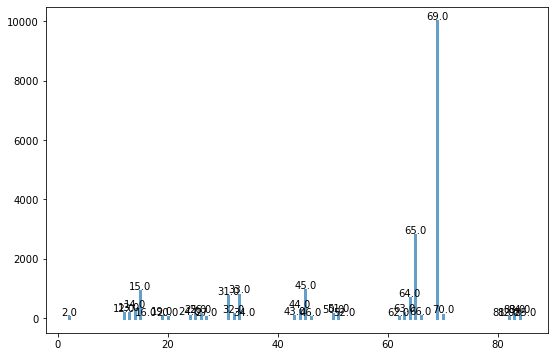

In [6]:
i=3
# 1つのデータについてみてみる。
a_ms_data=frag_enum_data.iloc[i,:]
print("iupac_name:",a_ms_data["iupac_name"])
print("molecular_formula:",a_ms_data["molecular_formula"])
mol=Chem.MolFromSmiles(a_ms_data["canonical_smiles"])
mol=Chem.AddHs(mol)
print("weight:",Descriptors.MolWt(mol))
smiles=Chem.MolToSmiles(mol)
print("SMILES:",smiles)

display(mol)


plt.figure(figsize=(9,6))
m_z=a_ms_data["x"]
intens=a_ms_data["y"]
spectrum_num=len(m_z)
# 真のデータを図示
for j in range(spectrum_num):
    plt.plot([m_z[j],m_z[j]],[0,intens[j]],color='C0',alpha=0.7, lw=3)
    plt.text(m_z[j], intens[j], m_z[j], ha='center', va='bottom',size=10)
print(m_z)

In [33]:
frag_enum_data["canonical_smiles"]

0                    CCF
1        C(C(F)(F)F)(F)F
2           C(C(F)F)(F)F
3              CC(F)(F)F
4              C(C(F)F)F
5                     CF
6                 C(CF)F
7                      C
8                     CC
9                  C(F)F
10                CC(F)F
11              C(F)(F)F
12           C(F)(F)(F)F
13    C(C(F)(F)F)(F)(F)F
14          C(C(F)(F)F)F
Name: canonical_smiles, dtype: object

In [35]:
frag_data=[]
for i in range(len(frag_enum_data)):
    a_ms_data=frag_enum_data.iloc[i,:]
    mol=Chem.MolFromSmiles(a_ms_data["canonical_smiles"])
    mol=Chem.AddHs(mol)
    smiles=Chem.MolToSmiles(mol)
    
    enumurated_smiles_list=a_ms_data["enumurated_smiles_list"]
    num_prod=len(enumurated_smiles_list)
    # 分子から考えられるフラグメントの集まり(Products)のリスト
    for j in range(num_prod):
        if len(enumurated_smiles_list[j])!=2:
            continue
        # フラグメントのリストの集まり(Products)から
        # SMILESのリストとMolのリストをとり出す
        smiles_list=enumurated_smiles_list[j]
        mol_list=[]
        for smi in smiles_list:
            frag_mol=Chem.MolFromSmiles(smi)
            frag_mol=Chem.AddHs(frag_mol)
            mol_list.append(frag_mol)
        # フラグメントの数
        frag_num=len(smiles_list)

        # 重複がないようにset化してSMILESを取り出す。
        for smi in set(smiles_list):
            # 当該SMILESのindex
            frag_idx=smiles_list.index(smi)
            # これが候補fragmentとなる
            candidate_frag=mol_list[frag_idx]
            frag_counter=0
            # fragmentの質量(MSのm/zとなる)
            weight=Descriptors.MolWt(candidate_frag)
            weight=int(np.round(weight,0))
            data_dict={
                "source_mol_no":i,
                "source":mol,
                "source_smiles":smiles,
                "candidate_frag":candidate_frag,
                "candidate_frag_smiles":smiles_list[frag_idx],
                "weight":weight,
                "intensity":a_ms_data[weight]}
            # 候補fragment以外を辞書に格納
            for k in range(frag_idx):
                data_dict["other_frag_{:0=2}".format(frag_counter)]=mol_list[k]
                data_dict["other_frag_{:0=2}_smiles".format(frag_counter)]=smiles_list[k]
                frag_counter+=1
            for k in range(frag_idx+1,frag_num):
                data_dict["other_frag_{:0=2}".format(frag_counter)]=mol_list[k]
                data_dict["other_frag_{:0=2}_smiles".format(frag_counter)]=smiles_list[k]
                frag_counter+=1
            frag_data.append(data_dict)

RDKit WARNING: [11:39:53] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:39:53] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:39:53] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:39:53] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:39:53] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:39:53] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:39:53] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:39:53] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:39:53] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:39:53] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:39:53] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:39:53] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:39:53] WARNING: not r

In [36]:
frag_df=pd.DataFrame(frag_data)
frag_df

,source_mol_no,source,source_smiles,candidate_frag,candidate_frag_smiles,weight,intensity,other_frag_00,other_frag_00_smiles
0,0,<rdkit.Chem.rdchem.Mol object at 0x7f7a2cf5ce90>,[H]C([H])([H])C([H])([H])F,<rdkit.Chem.rdchem.Mol object at 0x7f7a2d0ad440>,[H][H],2,0.0,<rdkit.Chem.rdchem.Mol object at 0x7f7a2d0ad1c0>,[H]C([H])=C([H])F
1,0,<rdkit.Chem.rdchem.Mol object at 0x7f7a2cf5ce90>,[H]C([H])([H])C([H])([H])F,<rdkit.Chem.rdchem.Mol object at 0x7f7a2d0ad1c0>,[H]C([H])=C([H])F,46,1021.0,<rdkit.Chem.rdchem.Mol object at 0x7f7a2d0ad440>,[H][H]
2,0,<rdkit.Chem.rdchem.Mol object at 0x7f7a2cf5ce90>,[H]C([H])([H])C([H])([H])F,<rdkit.Chem.rdchem.Mol object at 0x7f7a2d0adcb0>,[H]F,20,0.0,<rdkit.Chem.rdchem.Mol object at 0x7f7a2d0ad670>,[H]C([H])=C([H])[H]
3,0,<rdkit.Chem.rdchem.Mol object at 0x7f7a2cf5ce90>,[H]C([H])([H])C([H])([H])F,<rdkit.Chem.rdchem.Mol object at 0x7f7a2d0ad670>,[H]C([H])=C([H])[H],28,681.0,<rdkit.Chem.rdchem.Mol object at 0x7f7a2d0adcb0>,[H]F
4,0,<rdkit.Chem.rdchem.Mol object at 0x7f7a2cf5ce90>,[H]C([H])([H])C([H])([H])F,<rdkit.Chem.rdchem.Mol object at 0x7f7a2d0b5030>,[H],1,0.0,<rdkit.Chem.rdchem.Mol object at 0x7f7a2d0b5120>,[H][C]([H])C([H])([H])F
...,...,...,...,...,...,...,...,...,...
323,14,<rdkit.Chem.rdchem.Mol object at 0x7f7a2d6fbf80>,[H]C([H])(F)C(F)(F)F,<rdkit.Chem.rdchem.Mol object at 0x7f7a2d6fead0>,[H][C]([H])F,33,9999.0,<rdkit.Chem.rdchem.Mol object at 0x7f7a2d6fea80>,F[C](F)F
324,14,<rdkit.Chem.rdchem.Mol object at 0x7f7a2d6fbf80>,[H]C([H])(F)C(F)(F)F,<rdkit.Chem.rdchem.Mol object at 0x7f7a2d6fea80>,F[C](F)F,69,9048.0,<rdkit.Chem.rdchem.Mol object at 0x7f7a2d6fead0>,[H][C]([H])F
325,14,<rdkit.Chem.rdchem.Mol object at 0x7f7a2d6fbf80>,[H]C([H])(F)C(F)(F)F,<rdkit.Chem.rdchem.Mol object at 0x7f7a2d6febc0>,F[C]F,50,400.0,<rdkit.Chem.rdchem.Mol object at 0x7f7a2d6fec10>,[H]C([H])(F)F
326,14,<rdkit.Chem.rdchem.Mol object at 0x7f7a2d6fbf80>,[H]C([H])(F)C(F)(F)F,<rdkit.Chem.rdchem.Mol object at 0x7f7a2d6fec10>,[H]C([H])(F)F,52,30.0,<rdkit.Chem.rdchem.Mol object at 0x7f7a2d6febc0>,F[C]F


In [18]:
desc_list = Descriptors.descList

In [39]:
# ソースmolのデータについて記述子を計算
desc_data=[]
invalid_desc_set=set()
for index,row in frag_df.iterrows():
    c_mol=row["source"]
    desc_dict={}
    for desc,func in desc_list:
        try:
            desc_dict[desc]=func(c_mol)
        except:
            # エラーが発生したものについてはpd.NAを代入
            invalid_desc_set.add(desc)
            desc_dict[desc]=pd.NA
    desc_data.append(desc_dict)

In [40]:
source_desc_df=pd.DataFrame(desc_data)
# 欠損値のある列を削除する
source_desc_df=source_desc_df.dropna(how="any",axis=1)

# 有効な値が入っている記述子のみ抽出する
eff_desc_list=[]
source_rename_dict={}
for desc in source_desc_df:
    if source_desc_df[desc].std() >0:
        eff_desc_list.append(desc)
        source_rename_dict[desc]="source_"+desc
        
source_desc_df=source_desc_df[eff_desc_list]     
source_desc_df=source_desc_df.rename(columns=source_rename_dict)

In [44]:
# 候補フラグメントのデータについて記述子を計算
desc_data=[]
invalid_desc_set=set()
for index,row in frag_df.iterrows():
    c_mol=row["candidate_frag"]
    desc_dict={}
    for desc,func in desc_list:
        try:
            desc_dict[desc]=func(c_mol)
        except:
            # エラーが発生したものについてはpd.NAを代入
            invalid_desc_set.add(desc)
            desc_dict[desc]=pd.NA
    desc_data.append(desc_dict)

RDKit WARNING: [11:41:36] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:41:36] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:41:36] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:41:36] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:41:36] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:41:36] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:41:36] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:41:36] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:41:36] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:41:36] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:41:36] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:41:36] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:41:36] WARNING: not r

In [45]:
cand_desc_df=pd.DataFrame(desc_data)
# 欠損値のある列を削除する
cand_desc_df=cand_desc_df.dropna(how="any",axis=1)

# 有効な値が入っている記述子のみ抽出する
eff_desc_list=[]
cand_rename_dict={}
for desc in cand_desc_df:
    if cand_desc_df[desc].std() >0:
        eff_desc_list.append(desc)
        cand_rename_dict[desc]="cand_frag_"+desc
        
cand_desc_df=cand_desc_df[eff_desc_list]     
cand_desc_df=cand_desc_df.rename(columns=cand_rename_dict)

In [46]:
# もう片方のフラグメントのデータについて記述子を計算
desc_data=[]
invalid_desc_set=set()
for index,row in frag_df.iterrows():
    o_mol=row["other_frag_00"]
    desc_dict={}
    for desc,func in desc_list:
        try:
            desc_dict[desc]=func(o_mol)
        except:
            invalid_desc_set.add(desc)
            desc_dict[desc]=pd.NA
    desc_data.append(desc_dict)

RDKit WARNING: [11:42:30] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:42:30] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:42:30] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:42:31] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:42:31] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:42:31] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:42:31] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:42:31] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:42:31] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:42:31] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:42:31] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:42:31] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:42:31] WARNING: not r

In [47]:
other_desc_df=pd.DataFrame(desc_data)
other_desc_df=other_desc_df.dropna(how="any",axis=1)

eff_desc_list=[]
other_rename_dict={}
for desc in other_desc_df:
    if other_desc_df[desc].std() >0:
        eff_desc_list.append(desc)
        other_rename_dict[desc]="other_frag_"+desc
        
other_desc_df=other_desc_df[eff_desc_list]        
other_desc_df=other_desc_df.rename(columns=other_rename_dict)

In [54]:
whole_data=pd.concat([frag_df,source_desc_df,cand_desc_df,other_desc_df],axis=1)
whole_data

,source_mol_no,source,source_smiles,candidate_frag,candidate_frag_smiles,weight,intensity,other_frag_00,other_frag_00_smiles,source_MaxEStateIndex,...,other_frag_VSA_EState8,other_frag_VSA_EState9,other_frag_FractionCSP3,other_frag_HeavyAtomCount,other_frag_NumHeteroatoms,other_frag_NumRotatableBonds,other_frag_MolLogP,other_frag_MolMR,other_frag_fr_alkyl_halide,other_frag_fr_halogen
0,0,<rdkit.Chem.rdchem.Mol object at 0x7f7a2cf5ce90>,[H]C([H])([H])C([H])([H])F,<rdkit.Chem.rdchem.Mol object at 0x7f7a2d0ad440>,[H][H],2,0.0,<rdkit.Chem.rdchem.Mol object at 0x7f7a2d0ad1c0>,[H]C([H])=C([H])F,11.666667,...,-1.074074,0.000000,0.0,3,1,0,1.09940,11.305,0,1
1,0,<rdkit.Chem.rdchem.Mol object at 0x7f7a2cf5ce90>,[H]C([H])([H])C([H])([H])F,<rdkit.Chem.rdchem.Mol object at 0x7f7a2d0ad1c0>,[H]C([H])=C([H])F,46,1021.0,<rdkit.Chem.rdchem.Mol object at 0x7f7a2d0ad440>,[H][H],11.666667,...,0.000000,0.000000,0.0,0,0,0,0.24600,2.114,0,0
2,0,<rdkit.Chem.rdchem.Mol object at 0x7f7a2cf5ce90>,[H]C([H])([H])C([H])([H])F,<rdkit.Chem.rdchem.Mol object at 0x7f7a2d0adcb0>,[H]F,20,0.0,<rdkit.Chem.rdchem.Mol object at 0x7f7a2d0ad670>,[H]C([H])=C([H])[H],11.666667,...,-1.481481,0.000000,0.0,2,0,0,0.80220,11.254,0,0
3,0,<rdkit.Chem.rdchem.Mol object at 0x7f7a2cf5ce90>,[H]C([H])([H])C([H])([H])F,<rdkit.Chem.rdchem.Mol object at 0x7f7a2d0ad670>,[H]C([H])=C([H])[H],28,681.0,<rdkit.Chem.rdchem.Mol object at 0x7f7a2d0adcb0>,[H]F,11.666667,...,0.000000,0.000000,0.0,1,1,0,0.15250,2.503,0,1
4,0,<rdkit.Chem.rdchem.Mol object at 0x7f7a2cf5ce90>,[H]C([H])([H])C([H])([H])F,<rdkit.Chem.rdchem.Mol object at 0x7f7a2d0b5030>,[H],1,0.0,<rdkit.Chem.rdchem.Mol object at 0x7f7a2d0b5120>,[H][C]([H])C([H])([H])F,11.666667,...,-4.590278,0.000000,0.5,3,1,1,0.78999,11.332,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,14,<rdkit.Chem.rdchem.Mol object at 0x7f7a2d6fbf80>,[H]C([H])(F)C(F)(F)F,<rdkit.Chem.rdchem.Mol object at 0x7f7a2d6fead0>,[H][C]([H])F,33,9999.0,<rdkit.Chem.rdchem.Mol object at 0x7f7a2d6fea80>,F[C](F)F,11.104167,...,-3.083333,0.000000,0.0,4,3,0,1.34189,6.567,0,3
324,14,<rdkit.Chem.rdchem.Mol object at 0x7f7a2d6fbf80>,[H]C([H])(F)C(F)(F)F,<rdkit.Chem.rdchem.Mol object at 0x7f7a2d6fea80>,F[C](F)F,69,9048.0,<rdkit.Chem.rdchem.Mol object at 0x7f7a2d6fead0>,[H][C]([H])F,11.104167,...,0.000000,-1.583333,0.0,2,1,0,0.74749,6.465,0,1
325,14,<rdkit.Chem.rdchem.Mol object at 0x7f7a2d6fbf80>,[H]C([H])(F)C(F)(F)F,<rdkit.Chem.rdchem.Mol object at 0x7f7a2d6febc0>,F[C]F,50,400.0,<rdkit.Chem.rdchem.Mol object at 0x7f7a2d6fec10>,[H]C([H])(F)F,11.104167,...,-4.000000,0.000000,1.0,3,2,0,0.88290,7.083,2,2
326,14,<rdkit.Chem.rdchem.Mol object at 0x7f7a2d6fbf80>,[H]C([H])(F)C(F)(F)F,<rdkit.Chem.rdchem.Mol object at 0x7f7a2d6fec10>,[H]C([H])(F)F,52,30.0,<rdkit.Chem.rdchem.Mol object at 0x7f7a2d6febc0>,F[C]F,11.104167,...,-0.250000,0.000000,0.0,3,2,0,0.92169,5.459,0,2


In [56]:
X=whole_data[\
    list(source_rename_dict.values())+\
    list(cand_rename_dict.values())+\
    list(other_rename_dict.values())].values
Y=whole_data["intensity"].values

In [57]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,Y)

LinearRegression()

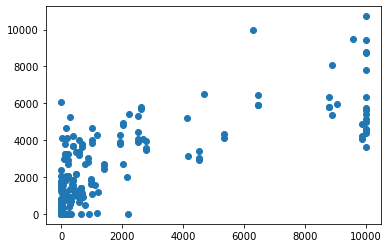

In [58]:
est_intensity=np.maximum(lr.predict(X),0)
plt.plot(Y,est_intensity,'o')